In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

random_state = 1000

In [79]:
df = pd.read_csv('Mall_Customers.csv')

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Due to the units of the feature variable being close together we don't need to scale the data for the PCA

In [80]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,1,19,15,39,True
1,2,21,15,81,True
2,3,20,16,6,False
3,4,23,16,77,False
4,5,31,17,40,False


In [81]:
X = df.drop('CustomerID', axis=1)

## PCA

In [82]:
from pca import pca

In [83]:
model=pca(n_components=3, normalize=True) 

In [84]:
results = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [4] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [85]:
results

{'loadings':           Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male
 PC1  0.687900           -0.006082               -0.686920     0.234302
 PC2 -0.103690            0.765252                0.103211     0.626886
 PC3  0.122384            0.643667               -0.136573    -0.743009,
 'PC':           PC1       PC2       PC3
 0   -0.406383 -0.520714 -2.072527
 1   -1.427673 -0.367310 -2.277644
 2    0.050761 -1.894068 -0.367375
 3   -1.694513 -1.631908 -0.717467
 4   -0.313108 -1.810483 -0.426460
 ..        ...       ...       ...
 195 -1.179572  1.324568  1.932441
 196  0.672751  1.221061  2.438084
 197 -0.723719  2.765010  0.583178
 198  0.767096  2.861930  1.150341
 199 -1.065015  3.137256  0.788146
 
 [200 rows x 3 columns],
 'explained_var': array([0.33690046, 0.5992069 , 0.83181329]),
 'variance_ratio': array([0.33690046, 0.26230645, 0.23260639]),
 'model': PCA(n_components=3),
 'scaler': StandardScaler(),
 'pcp': 0.8318132878845949,
 'topfeat':     PC             

In [86]:
loadings=results['loadings']
loadings.T

,PC1,PC2,PC3
Age,0.687900,-0.103690,0.122384
Annual Income (k$),-0.006082,0.765252,0.643667
Spending Score (1-100),-0.686920,0.103211,-0.136573
Gender_Male,0.234302,0.626886,-0.743009


In [87]:
scores=results['PC']
scores.head()

,PC1,PC2,PC3
0,-0.406383,-0.520714,-2.072527
1,-1.427673,-0.367310,-2.277644
2,0.050761,-1.894068,-0.367375
3,-1.694513,-1.631908,-0.717467
4,-0.313108,-1.810483,-0.426460


## PVE

In [88]:
# Explained variance per PC
print(model.results['variance_ratio'])

[0.33690046 0.26230645 0.23260639]


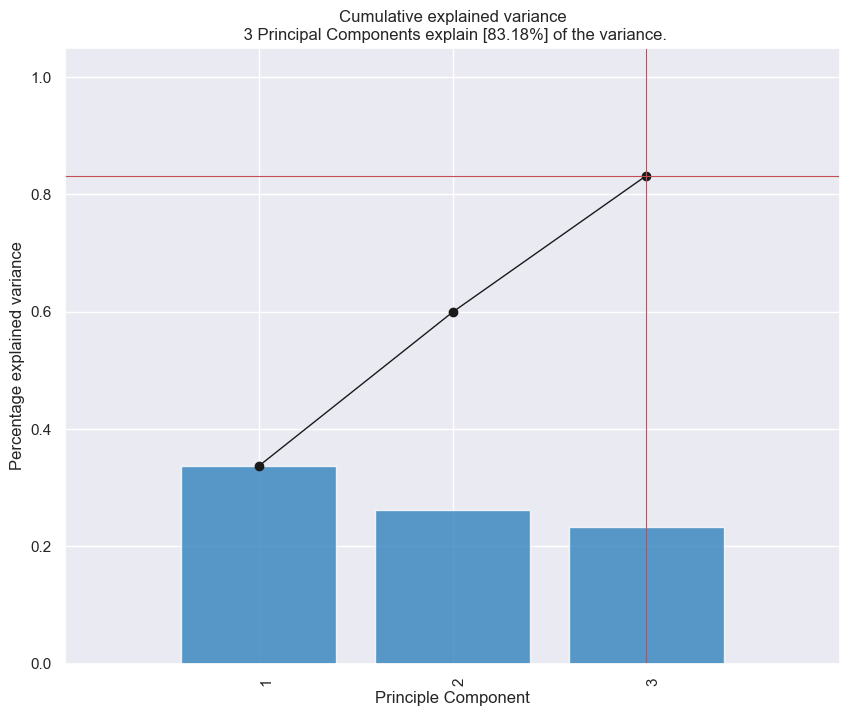

In [89]:
model.plot(figsize=(10,8))
plt.show()

## Biplot

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 with loadings.


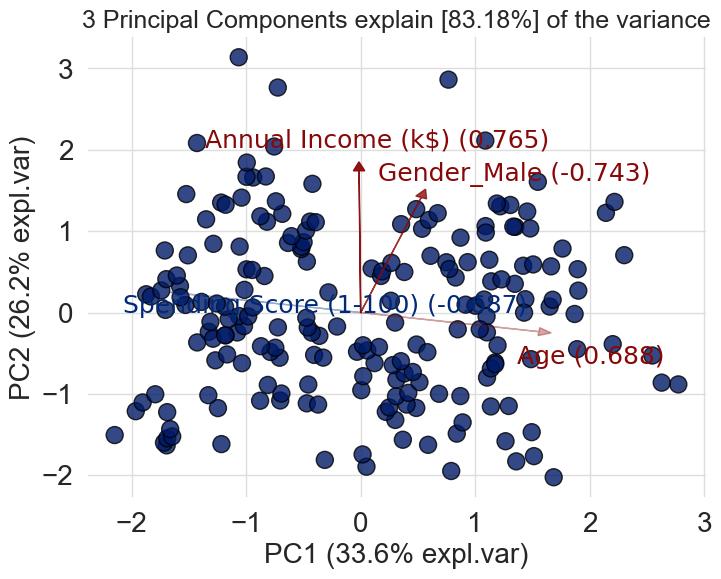

In [90]:
model.biplot(figsize=(8,6))
plt.show()

I would say based on the biplot they should split it into 2 categories being spending score and annual income. 